In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("cleaning/ecommerce_customers.csv")

In [4]:
df.head()

,CustomerID,Age,Gender,Annual Income,Spending Score,Last Purchase,Membership Status
0,CUST1000,51,Female,117866.9,81.0,"Apr 30, 2024",Silver
1,CUST1001,33,MALE,25429.51 USD,58.0,2024-11-30,Silver
2,CUST1002,24,FEMALE,69437.33,30.0,28-02-2023,Gold
3,CUST1003,34,MALE,$105023.33,68.0,NaN,Silver
4,CUST1004,55,Male,NaN,22.0,05-02-2023,Silver


In [5]:
df.index

RangeIndex(start=0, stop=260, step=1)

In [6]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Annual Income', 'Spending Score',
       'Last Purchase', 'Membership Status'],
      dtype='object')

In [13]:
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [14]:
df.columns

Index(['customerid', 'age', 'gender', 'annual_income', 'spending_score',
       'last_purchase', 'membership_status'],
      dtype='object')

In [15]:
df.gender = df.gender.str.strip().str.lower()
df.head()

,customerid,age,gender,annual_income,spending_score,last_purchase,membership_status
0,CUST1000,51,female,117866.9,81.0,"Apr 30, 2024",Silver
1,CUST1001,33,male,25429.51 USD,58.0,2024-11-30,Silver
2,CUST1002,24,female,69437.33,30.0,28-02-2023,Gold
3,CUST1003,34,male,$105023.33,68.0,NaN,Silver
4,CUST1004,55,male,NaN,22.0,05-02-2023,Silver


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         260 non-null    object 
 1   age                254 non-null    object 
 2   gender             260 non-null    object 
 3   annual_income      189 non-null    object 
 4   spending_score     251 non-null    float64
 5   last_purchase      247 non-null    object 
 6   membership_status  150 non-null    object 
dtypes: float64(1), object(6)
memory usage: 14.3+ KB


In [17]:
df.age.unique()

array(['51', '33', '24', '34', '55', '45', '37', '67', '50', '57', '25',
       'twenty-five', '44', '69', '31', '60', '23', '61', '42', '22',
       '43', '38', '35', '66', '20', '40', '52', '49', '63', '65', '59',
       '54', '19', '62', '58', '21', '53', '70', '56', '28', '29', '41',
       '18', '48', '36', '27', '64', nan, '46', '68', '30', '47', '26',
       '32', '39'], dtype=object)

In [22]:
!pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5647 sha256=d50bf2b3dfe49fe184a82f9a137eefa3892af9cf893292ddb9f0acec0bbd0d6f
  Stored in directory: c:\users\sourcebird\appdata\local\pip\cache\wheels\5b\79\fb\d25928e599c7e11fe4e00d32048cd74933f34a74c633d2aea6
Successfully built word2number


In [26]:
from  word2number import w2n

w2n.word_to_num('twenty-five')

25

In [29]:
my_ages = []

for age in df.age.values:
    if pd.isna(age):
        my_ages.append(age) # we plan to fill na with the mean
    else:
        try:
            my_ages.append(int(age))
        except:
            my_ages.append(w2n.word_to_num(age))

In [31]:
df.age = my_ages
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         260 non-null    object 
 1   age                254 non-null    float64
 2   gender             260 non-null    object 
 3   annual_income      189 non-null    object 
 4   spending_score     251 non-null    float64
 5   last_purchase      247 non-null    object 
 6   membership_status  150 non-null    object 
dtypes: float64(2), object(5)
memory usage: 14.3+ KB


In [32]:
df.head()

,customerid,age,gender,annual_income,spending_score,last_purchase,membership_status
0,CUST1000,51.0,female,117866.9,81.0,"Apr 30, 2024",Silver
1,CUST1001,33.0,male,25429.51 USD,58.0,2024-11-30,Silver
2,CUST1002,24.0,female,69437.33,30.0,28-02-2023,Gold
3,CUST1003,34.0,male,$105023.33,68.0,NaN,Silver
4,CUST1004,55.0,male,NaN,22.0,05-02-2023,Silver


In [36]:
mean = int(df.age.mean())
mean

43

In [37]:
df.age.fillna(mean, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         260 non-null    object 
 1   age                260 non-null    float64
 2   gender             260 non-null    object 
 3   annual_income      189 non-null    object 
 4   spending_score     251 non-null    float64
 5   last_purchase      247 non-null    object 
 6   membership_status  150 non-null    object 
dtypes: float64(2), object(5)
memory usage: 14.3+ KB


In [54]:
df_new = df.dropna(ignore_index=True) 

In [55]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         100 non-null    object 
 1   age                100 non-null    float64
 2   gender             100 non-null    object 
 3   annual_income      100 non-null    object 
 4   spending_score     100 non-null    float64
 5   last_purchase      100 non-null    object 
 6   membership_status  100 non-null    object 
dtypes: float64(2), object(5)
memory usage: 5.6+ KB


In [56]:
df_new.annual_income.unique()

array(['117866.9', '25429.51', '69437.33', '53010.8', '56319.18',
       '93770.45', '53458.89', '119448.96', '45311.03', '113130.57',
       '93628.73', '52179.17', '33281.88', '97151.63', '117394.73',
       '67238.35', '42883.28', '103875.44', '99610.32', '99154.69',
       '25151.87', '72518.68', '63429.88', '57190.37', '52640.52',
       '107107.08', '61793.1', '98723.88', '59249.69', '96995.23',
       '62780.29', '42548.34', '87248.7', '72508.34', '30406.91',
       '39141.02', '53686.16', '88718.52', '66969.5', '89317.54',
       '38671.3', '49711.38', '42797.02', '36355.9', '62742.59',
       '94809.74', '32917.04', '58184.84', '83005.38', '68260.55',
       '74001.28', '109416.18', '33514.52', '54534.32', '44690.62',
       '25895.24', '71536.94', '102459.07', '59737.4', '95603.59',
       '97794.17', '62410.42', '58746.55', '92311.66', '63726.8',
       '28570.8', '117700.06', '90079.23', '78828.41', '30222.74',
       '63756.32', '53418.23', '56501.66', '81937.82', '108764.

In [57]:
df_new.annual_income = df_new.annual_income.str.lower().str.replace("$", "").str.replace("usd", "").str.strip()

C:\Users\SourceBird\AppData\Local\Temp\ipykernel_14468\2369537876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.annual_income = df_new.annual_income.str.lower().str.replace("$", "").str.replace("usd", "").str.strip()


In [58]:
df_new.annual_income.unique()

array(['117866.9', '25429.51', '69437.33', '53010.8', '56319.18',
       '93770.45', '53458.89', '119448.96', '45311.03', '113130.57',
       '93628.73', '52179.17', '33281.88', '97151.63', '117394.73',
       '67238.35', '42883.28', '103875.44', '99610.32', '99154.69',
       '25151.87', '72518.68', '63429.88', '57190.37', '52640.52',
       '107107.08', '61793.1', '98723.88', '59249.69', '96995.23',
       '62780.29', '42548.34', '87248.7', '72508.34', '30406.91',
       '39141.02', '53686.16', '88718.52', '66969.5', '89317.54',
       '38671.3', '49711.38', '42797.02', '36355.9', '62742.59',
       '94809.74', '32917.04', '58184.84', '83005.38', '68260.55',
       '74001.28', '109416.18', '33514.52', '54534.32', '44690.62',
       '25895.24', '71536.94', '102459.07', '59737.4', '95603.59',
       '97794.17', '62410.42', '58746.55', '92311.66', '63726.8',
       '28570.8', '117700.06', '90079.23', '78828.41', '30222.74',
       '63756.32', '53418.23', '56501.66', '81937.82', '108764.

In [59]:
df_new.annual_income = pd.to_numeric(df_new.annual_income)

C:\Users\SourceBird\AppData\Local\Temp\ipykernel_14468\3020398864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.annual_income = pd.to_numeric(df_new.annual_income)


In [60]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerid         100 non-null    object 
 1   age                100 non-null    float64
 2   gender             100 non-null    object 
 3   annual_income      100 non-null    float64
 4   spending_score     100 non-null    float64
 5   last_purchase      100 non-null    object 
 6   membership_status  100 non-null    object 
dtypes: float64(3), object(4)
memory usage: 5.6+ KB


In [61]:
df_new.head()

,customerid,age,gender,annual_income,spending_score,last_purchase,membership_status
0,CUST1000,51.0,female,117866.90,81.0,"Apr 30, 2024",Silver
1,CUST1001,33.0,male,25429.51,58.0,2024-11-30,Silver
2,CUST1002,24.0,female,69437.33,30.0,28-02-2023,Gold
3,CUST1007,33.0,female,53010.80,13.0,2024-03-09,Silver
4,CUST1009,50.0,female,56319.18,61.0,03/01/2023,Bronze


In [64]:
df_new.last_purchase = pd.to_datetime(df_new.last_purchase,format='mixed' )

C:\Users\SourceBird\AppData\Local\Temp\ipykernel_14468\769852875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.last_purchase = pd.to_datetime(df_new.last_purchase,format='mixed' )


In [65]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         100 non-null    object        
 1   age                100 non-null    float64       
 2   gender             100 non-null    object        
 3   annual_income      100 non-null    float64       
 4   spending_score     100 non-null    float64       
 5   last_purchase      100 non-null    datetime64[ns]
 6   membership_status  100 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 5.6+ KB


In [116]:
df_new.membership_status = df_new.membership_status.str.strip().str.lower()

In [67]:
df_new = df_new.drop_duplicates()

In [68]:
df_new.head()

,customerid,age,gender,annual_income,spending_score,last_purchase,membership_status
0,CUST1000,51.0,female,117866.90,81.0,2024-04-30,Silver
1,CUST1001,33.0,male,25429.51,58.0,2024-11-30,Silver
2,CUST1002,24.0,female,69437.33,30.0,2023-02-28,Gold
3,CUST1007,33.0,female,53010.80,13.0,2024-03-09,Silver
4,CUST1009,50.0,female,56319.18,61.0,2023-03-01,Bronze


In [70]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 96
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customerid         97 non-null     object        
 1   age                97 non-null     float64       
 2   gender             97 non-null     object        
 3   annual_income      97 non-null     float64       
 4   spending_score     97 non-null     float64       
 5   last_purchase      97 non-null     datetime64[ns]
 6   membership_status  97 non-null     object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 6.1+ KB


In [ ]:
# visualiztion

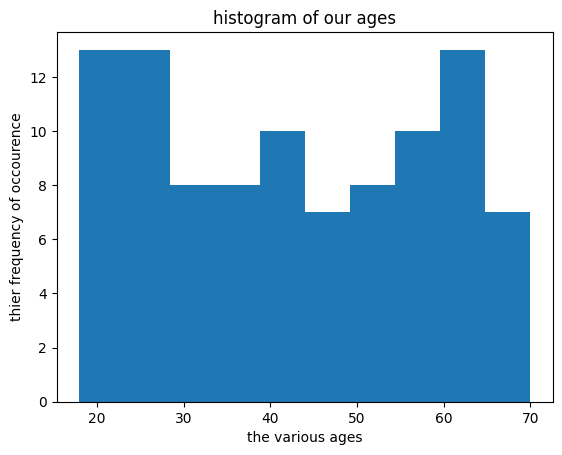

In [81]:
# histtype : {'bar', 'barstacked', 'step', 'stepfilled'}
plt.hist(df_new.age.values,  histtype='barstacked', )#rwidth=0.8)
plt.title("histogram of our ages")
plt.xlabel("the various ages")
plt.ylabel("thier frequency of occourence")
plt.show()

In [111]:
females = len(list(filter(lambda x:  x, (df_new.gender == "female").values)))

In [112]:
males = df_new.gender.count() - females
{ 'females': females, 'males': int(males)}

{'females': 55, 'males': 42}

In [109]:
gender_count = {}

for g in df_new.gender.values:
    if gender_count.get(g) == None:
        gender_count[g] = 0
    gender_count[g] += 1
gender_count

{'female': 55, 'male': 42}

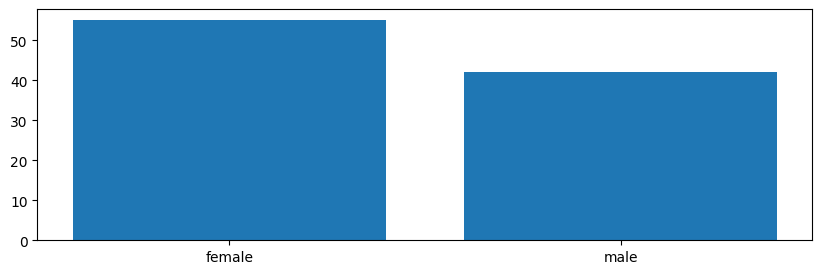

In [110]:
plt.figure(figsize=(10, 3))

x = gender_count.keys()
y = gender_count.values()
plt.bar(x, height=y)
plt.show()


In [113]:
df_new.head()

,customerid,age,gender,annual_income,spending_score,last_purchase,membership_status
0,CUST1000,51.0,female,117866.90,81.0,2024-04-30,Silver
1,CUST1001,33.0,male,25429.51,58.0,2024-11-30,Silver
2,CUST1002,24.0,female,69437.33,30.0,2023-02-28,Gold
3,CUST1007,33.0,female,53010.80,13.0,2024-03-09,Silver
4,CUST1009,50.0,female,56319.18,61.0,2023-03-01,Bronze


In [117]:
df_new.membership_status.unique()

array(['silver', 'gold', 'bronze'], dtype=object)

In [118]:
membership_count = {}

for m in df_new.membership_status.values:
    if membership_count.get(m) == None:
        membership_count[m] = 0
    membership_count[m] += 1
membership_count

{'silver': 30, 'gold': 43, 'bronze': 24}

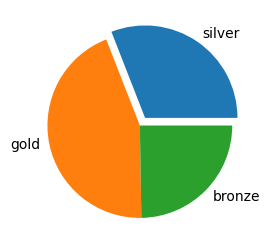

In [123]:
plt.figure(figsize=(3, 3))
y = membership_count.values()
labels = membership_count.keys()
explode=[0.1, 0, 0] #optional
plt.pie(y, labels=labels, explode=explode)
plt.show()

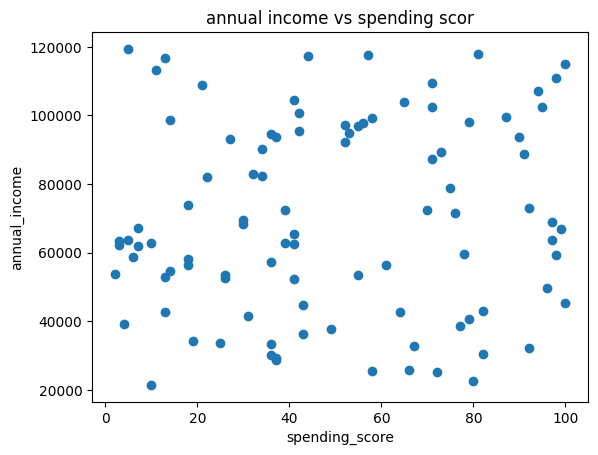

In [127]:
y = df_new.annual_income.values
x = df_new.spending_score.values

plt.scatter(x, y)
plt.xlabel("spending_score")
plt.ylabel("annual_income")
plt.title("annual income vs spending scor")
plt.show()

In [130]:
df_new.spending_score
df_new.membership_status

0     silver
1     silver
2       gold
3     silver
4     bronze
       ...  
92      gold
93      gold
94      gold
95    silver
96    silver
Name: membership_status, Length: 97, dtype: object

In [135]:
df_new.groupby('gender').count().apply(list)

,customerid,age,annual_income,spending_score,last_purchase,membership_status
gender,,,,,,
female,55,55,55,55,55,55
male,42,42,42,42,42,42


In [136]:
spend_grouping = df_new.groupby('membership_status')['spending_score'].apply(list)

In [139]:
spend_grouping.index

Index(['bronze', 'gold', 'silver'], dtype='object', name='membership_status')

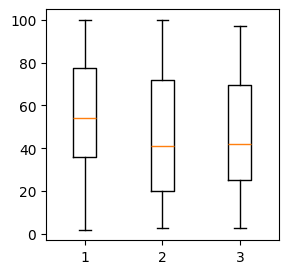

In [143]:
plt.figure(figsize=(3, 3))
plt.boxplot(spend_grouping, label=list(spend_grouping.index))
plt.show()

In [144]:
import streamlit as st

In [ ]:
st.write('Here is a ecommerce dataset:', df_new)